##O que esperamos

1.   Apresentação estruturada (definição/contexto do problema, análise dos dados, comparação dos modelos e métricas, resultados e conclusões).

2.   Para bases que utilizam imagens, é obrigatório comparar Redes Densas com Redes Convolucionais.
3.  Para bases que utilizam texto, é obrigatório comparar Redes Densas com Redes Recorrentes.
4.  Métricas de avaliação que fazem sentido para o problema em questão
5.  Matriz de confusão para evidenciar os erros do modelo
6.  Analisar as curvas de loss e acurácia (ou outra métrica de interesse) durante o treinamento para análise da curva de aprendizagem.
7. Análise de impacto no negócio

###**Carregar Dados**

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
!unzip classificacao-imagem-tipos-cenarios-pelo-mundo-20250408T234526Z-001.zip -d /content/

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/buildings/11309.jpg  
  inflating: /content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/buildings/11235.jpg  
  inflating: /content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/buildings/10812.jpg  
  inflating: /content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/buildings/10798.jpg  
  inflating: /content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/buildings/10921.jpg  
  inflating: /content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/buildings/10828.jpg  
  inflating: /content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/buildings/11108.jpg  
  inflating: /content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/buildings/11181.jpg  
  inflating: /content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/buildings/112.jpg  
  inflating: /content/classificacao-imagem-tipos-cenarios-pelo-mundo/t

In [5]:
# Caminho da pasta onde estão os datasets
IMGS_DIR = '/content/classificacao-imagem-tipos-cenarios-pelo-mundo'

In [6]:
import glob

# Busca por todas as imagens com extensão .jpg
image_files = glob.glob(f"{IMGS_DIR}/**/*.jpg", recursive=True)

In [7]:
import pandas as pd

# DataFrame para organizar as informações das imagens
df = pd.DataFrame(image_files, columns=['full_path'])

In [8]:
df

,full_path
0,/content/classificacao-imagem-tipos-cenarios-p...
1,/content/classificacao-imagem-tipos-cenarios-p...
2,/content/classificacao-imagem-tipos-cenarios-p...
3,/content/classificacao-imagem-tipos-cenarios-p...
4,/content/classificacao-imagem-tipos-cenarios-p...
...,...
16942,/content/classificacao-imagem-tipos-cenarios-p...
16943,/content/classificacao-imagem-tipos-cenarios-p...
16944,/content/classificacao-imagem-tipos-cenarios-p...
16945,/content/classificacao-imagem-tipos-cenarios-p...


In [9]:
# Extrair informações úteis do caminho da imagem
df['type_dataset'] = df.full_path.apply(lambda x: x.split('/')[-3])  # Treino/Teste/Validação (separação)
df['target'] = df.full_path.apply(lambda x: x.split('/')[-2])        # Categoria (classe) da imagem
df['filename'] = df.full_path.apply(lambda x: x.split('/')[-1])      # Nome do arquivo
df['extension'] = df.full_path.apply(lambda x: x.split('.')[-1])     # Extensão do arquivo

In [10]:
# Verificar a quantidade de imagens por classe e por tipo de dataset (train/test)
print("Distribuição por tipo de dataset:")
print(df['type_dataset'].value_counts())

print("\nDistribuição por classe (target):")
print(df['target'].value_counts())

# Distribuição cruzada para garantir que todas as classes estão em treino e teste
print("\nDistribuição cruzada (dataset x classe):")
print(pd.crosstab(df['type_dataset'], df['target']))

Distribuição por tipo de dataset:
type_dataset
train    13947
test      3000
Name: count, dtype: int64

Distribuição por classe (target):
target
mountain     3037
street       2883
glacier      2870
sea          2784
forest       2745
buildings    2628
Name: count, dtype: int64

Distribuição cruzada (dataset x classe):
target        buildings  forest  glacier  mountain   sea  street
type_dataset                                                    
test                437     474      553       525   510     501
train              2191    2271     2317      2512  2274    2382


In [11]:
from sklearn.model_selection import train_test_split

# Filtrar as imagens de treino
df_train = df[df['type_dataset'] == 'train']
df_test = df[df['type_dataset'] == 'test']

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Gerador com normalização
datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# from PIL import Image
# import os
# import tqdm

## Caminhos de todas as imagens do treino
# imagens_treino = df_train['full_path'].tolist()

# imagens_ruins = []

# for caminho in tqdm.tqdm(imagens_treino):
#     try:
#         img = Image.open(caminho)
#         img.verify()  # Verifica sem carregar na memória
#     except Exception as e:
#         imagens_ruins.append(caminho)
#
# print(f"Total de imagens corrompidas: {len(imagens_ruins)}")
# imagens_ruins[:5]  # Visualiza as primeiras

Imagens Corrompidas do Treino:
[

  '/content/drive/MyDrive/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/2109.jpg',

 '/content/drive/MyDrive/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/2137.jpg',

 '/content/drive/MyDrive/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/2086.jpg',

 '/content/drive/MyDrive/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/21.jpg',

 '/content/drive/MyDrive/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/2132.jpg',

 '/content/drive/MyDrive/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/2148.jpg'

]

In [14]:
imagens_ruins = [
    '/content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/2109.jpg',
    '/content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/2137.jpg',
    '/content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/2086.jpg',
    '/content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/21.jpg',
    '/content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/2132.jpg',
    '/content/classificacao-imagem-tipos-cenarios-pelo-mundo/train/sea/2148.jpg'
]

In [15]:
# Remove as imagens problemáticas do DataFrame
df_train = df_train[~df_train['full_path'].isin(imagens_ruins)]

In [16]:
# Gerador para o conjunto de treino
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='full_path',         # Caminho completo da imagem
    y_col='target',            # Nome da classe
    target_size=(64, 64),      # Tamanho que será redimensionado (como nas aulas)
    batch_size=32,
    class_mode='categorical',  # Para classificação multiclasse
    shuffle=True,
    seed=42
)

Found 13941 validated image filenames belonging to 6 classes.


In [17]:
# Gerador para o conjunto de teste
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='full_path',
    y_col='target',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 3000 validated image filenames belonging to 6 classes.


In [18]:
import matplotlib.pyplot as plt

# Obter um batch de imagens
imagens, labels = next(train_generator)

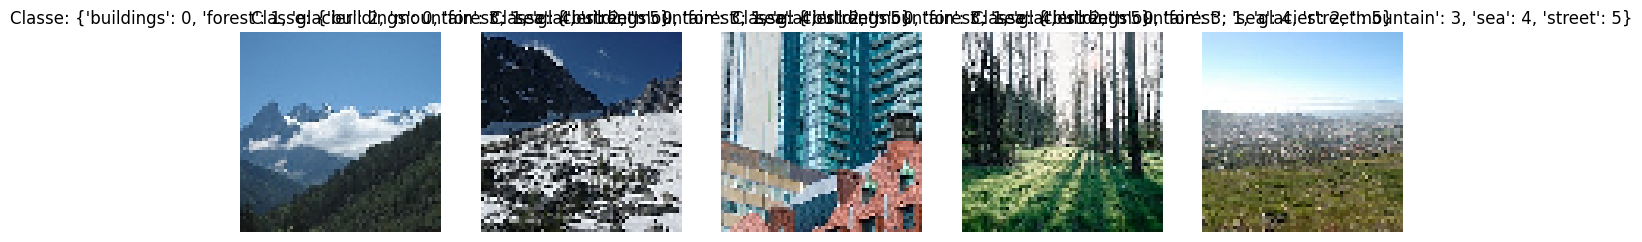

In [19]:
# Mostrar as primeiras 5 imagens com seus respectivos rótulos
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(imagens[i])
    plt.title(f"Classe: {train_generator.class_indices}")
    plt.axis('off')

In [20]:
# Obter o dicionário de classes {classe: índice}
idx_to_label = {v: k for k, v in train_generator.class_indices.items()}

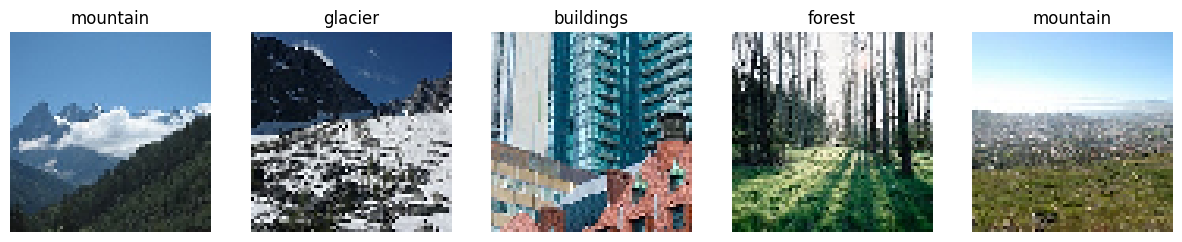

In [21]:
# Mostrar com rótulo real
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(imagens[i])
    classe_idx = labels[i].argmax()
    plt.title(f"{idx_to_label[classe_idx]}")
    plt.axis('off')

In [22]:
import os

train_dir = '/content/classificacao-imagem-tipos-cenarios-pelo-mundo/train'
class_names = sorted(os.listdir(train_dir))

class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

### **Rede Densa**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Criação do modelo
modelo_denso = Sequential()

# Camada de entrada + flatten
modelo_denso.add(Flatten(input_shape=(64, 64, 3)))  # 64x64 pixels com 3 canais (RGB)

# Camada oculta 2
modelo_denso.add(Dense(units=600, activation='relu'))

# Camada oculta 3
modelo_denso.add(Dense(units=400, activation='relu'))

# Camada oculta 4
modelo_denso.add(Dense(units=100, activation='relu'))

# Camada de saída (6 classes)
modelo_denso.add(Dense(units=6, activation='softmax'))

# Compilação do modelo
modelo_denso.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

# Resumo da arquitetura
modelo_denso.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 600)            │     7,373,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       240,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,654,506 (29.20 MB)

 Trainable params: 7,654,506 (29.20 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import tensorflow as tf

# Mostra o dispositivo usado
device_name = tf.test.gpu_device_name()
if device_name:
    print(f"✅ GPU detectada: {device_name}")
else:
    print("❌ GPU não encontrada. Verifique se ela está ativada nas configurações.")

✅ GPU detectada: /device:GPU:0


In [25]:
# Treinamento da rede densa

with tf.device('/GPU:0'):
  history_denso = modelo_denso.fit(
      train_generator,
      validation_data=test_generator,
      epochs=20,
      batch_size=128
  )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


436/436 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.3598 - loss: 2.3760 - val_accuracy: 0.4960 - val_loss: 1.3068
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.5135 - loss: 1.2586 - val_accuracy: 0.5260 - val_loss: 1.2521
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.5448 - loss: 1.1807 - val_accuracy: 0.5540 - val_loss: 1.1826
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.5720 - loss: 1.1205 - val_accuracy: 0.5700 - val_loss: 1.1529
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5873 - loss: 1.0823 - val_accuracy: 0.5763 - val_loss: 1.1177
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6062 - loss: 1.0376 - val_accuracy: 0.5163 - val_loss: 1.2706
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6157 - loss: 1.0285 - val_accuracy: 0.5620 - val_loss: 1.1441
Epoch 8/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.6282 - loss: 0.9757 - val_accurac

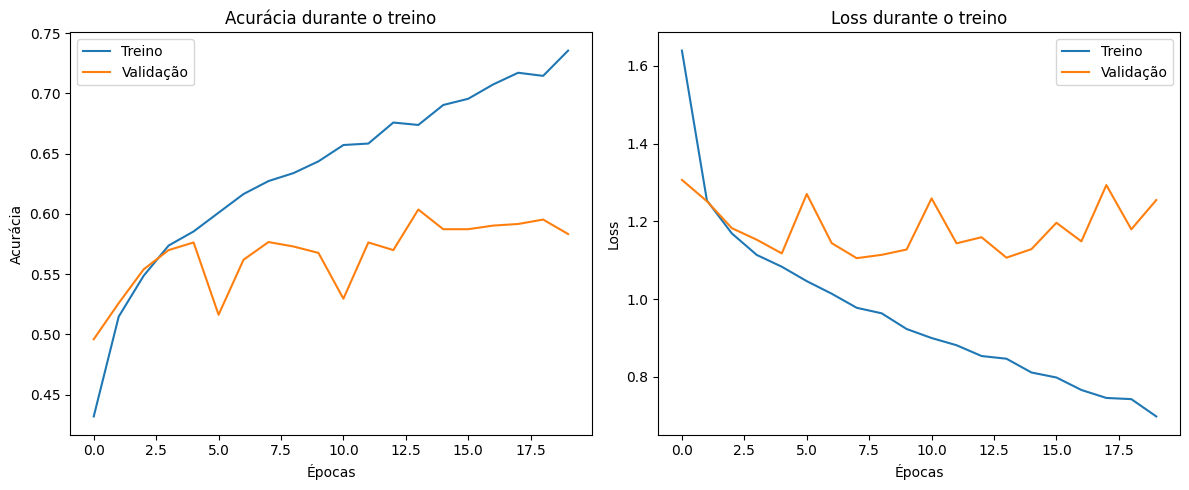

In [26]:
import matplotlib.pyplot as plt

# Função auxiliar para plotar loss e accuracy
def plot_curvas_aprendizado(history):
    # Acurácia
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treino')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title('Acurácia durante o treino')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treino')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Loss durante o treino')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Exibir as curvas
plot_curvas_aprendizado(history_denso)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Passo 1: Previsões do modelo no gerador de teste
y_pred_probs = modelo_denso.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Passo 2: Rótulos reais do gerador de teste
y_true = test_generator.classes  # já vem como índices numéricos

# Passo 3: Rótulos de texto para exibir nos relatórios
labels_texto = list(test_generator.class_indices.keys())

# Passo 4: Matriz de confusão e classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels_texto))

print("Matriz de Confusão:")
matriz = confusion_matrix(y_true, y_pred)
print(matriz)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step
Classification Report:
              precision    recall  f1-score   support

   buildings       0.47      0.39      0.43       437
      forest       0.82      0.70      0.76       474
     glacier       0.50      0.77      0.61       553
    mountain       0.66      0.56      0.60       525
         sea       0.49      0.33      0.39       510
      street       0.60      0.71      0.65       501

    accuracy                           0.58      3000
   macro avg       0.59      0.58      0.57      3000
weighted avg       0.59      0.58      0.58      3000

Matriz de Confusão:
[[171  20  64  40  43  99]
 [ 37 333  11  14  14  65]
 [ 13   2 427  35  49  27]
 [ 41   6 123 293  52  10]
 [ 50  21 180  52 168  39]
 [ 48  22  45  13  15 358]]


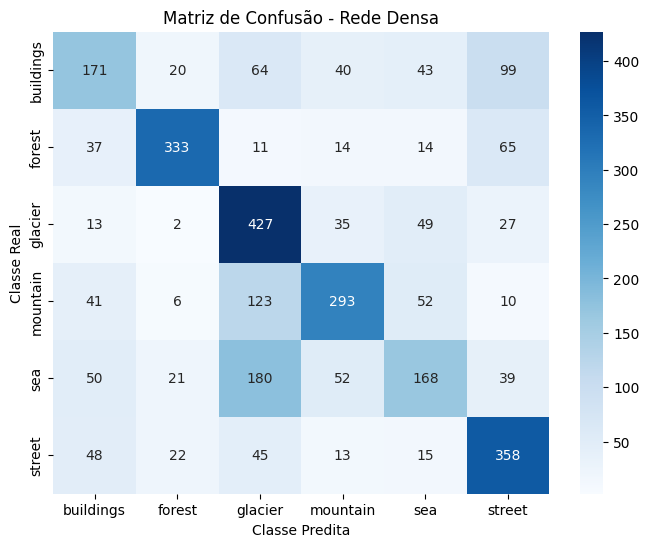

In [28]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', xticklabels=labels_texto, yticklabels=labels_texto, cmap="Blues")

plt.title("Matriz de Confusão - Rede Densa")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

###**Redes Convolucionais**

#### Modelo CNN (baseline)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Modelo CNN básico
modelo_cnn = Sequential()

# Camada convolucional 1
modelo_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
modelo_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Camada convolucional 2
modelo_cnn.add(Conv2D(64, (3, 3), activation='relu'))
modelo_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Camadas finais: Flatten + Dense
modelo_cnn.add(Flatten())
modelo_cnn.add(Dense(64, activation='relu'))
modelo_cnn.add(Dense(6, activation='softmax'))  # 6 classes

# Compilação do modelo
modelo_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

modelo_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,662 (3.14 MB)

 Trainable params: 822,662 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Treinamento do modelo CNN
with tf.device('/GPU:0'):
  history_cnn = modelo_cnn.fit(
      train_generator,
      validation_data=test_generator,
      epochs=20,
      batch_size=128
  )

Epoch 1/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.5522 - loss: 1.1373 - val_accuracy: 0.7007 - val_loss: 0.7817
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7480 - loss: 0.7024 - val_accuracy: 0.7580 - val_loss: 0.6831
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7964 - loss: 0.5880 - val_accuracy: 0.7537 - val_loss: 0.6665
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8430 - loss: 0.4457 - val_accuracy: 0.7403 - val_loss: 0.7534
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8665 - loss: 0.3796 - val_accuracy: 0.7793 - val_loss: 0.6457
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9092 - loss: 0.2647 - val_accuracy: 0.7630 - val_loss: 0.7805
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9344 - loss: 0.1965 - val_accuracy: 0.7760 - val_loss: 0.7533
Epoch 8/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9596 - loss: 0.1316 - 

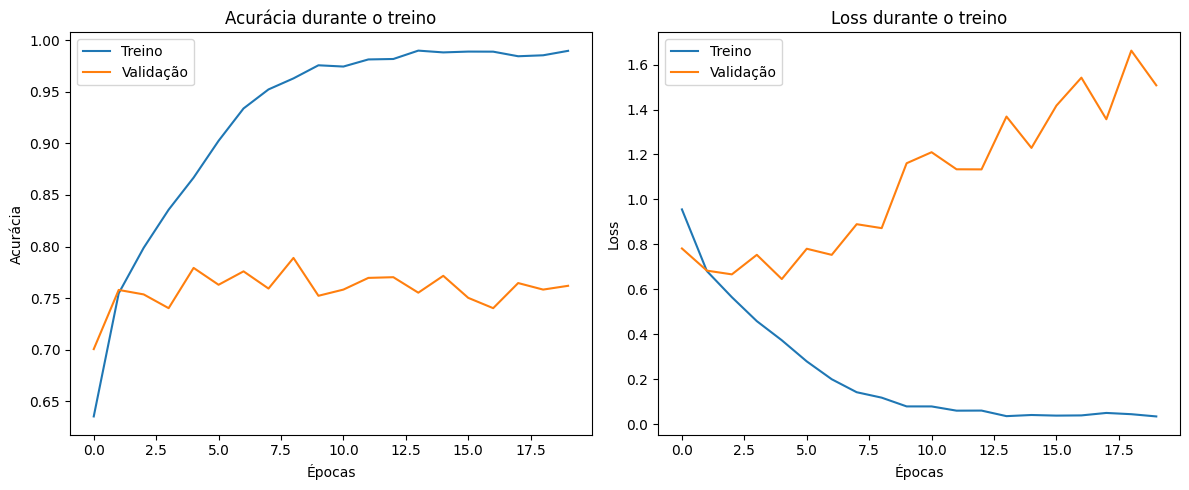

In [33]:
def plot_curvas_aprendizado(history):
    import matplotlib.pyplot as plt

    # Acurácia
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treino')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title('Acurácia durante o treino')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treino')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Loss durante o treino')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Exibir curvas da CNN
plot_curvas_aprendizado(history_cnn)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
Classification Report (CNN):
              precision    recall  f1-score   support

   buildings       0.72      0.73      0.73       437
      forest       0.92      0.93      0.93       474
     glacier       0.72      0.69      0.70       553
    mountain       0.68      0.70      0.69       525
         sea       0.75      0.75      0.75       510
      street       0.80      0.78      0.79       501

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000



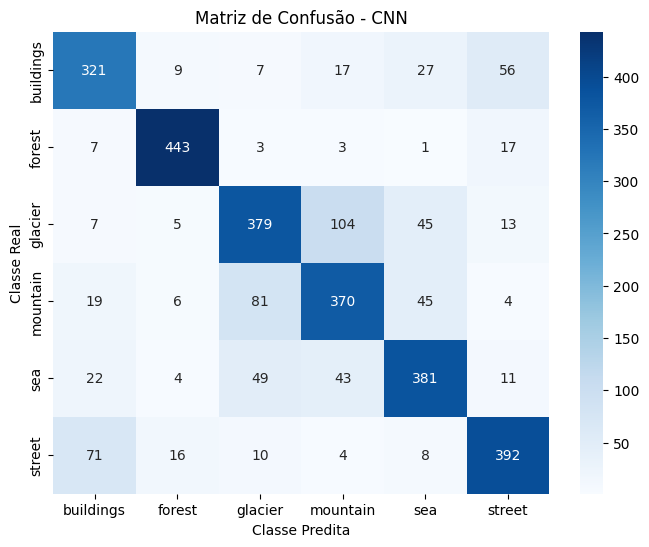

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Previsões
y_pred_probs_cnn = modelo_cnn.predict(test_generator)
y_pred_cnn = np.argmax(y_pred_probs_cnn, axis=1)
y_true = test_generator.classes

# Rótulos de texto (nomes das classes)
labels_texto = list(test_generator.class_indices.keys())

# Relatório de classificação
print("Classification Report (CNN):")
print(classification_report(y_true, y_pred_cnn, target_names=labels_texto))

# Matriz de confusão
matriz_cnn = confusion_matrix(y_true, y_pred_cnn)

# Plot da matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_cnn, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels_texto, yticklabels=labels_texto)
plt.title("Matriz de Confusão - CNN")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

#### Modelo com Dropout

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Modelo CNN com Dropout
modelo_cnn_dropout = Sequential()

# Camada convolucional 1
modelo_cnn_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
modelo_cnn_dropout.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout entre camadas
modelo_cnn_dropout.add(Dropout(0.25))

# Camada convolucional 2
modelo_cnn_dropout.add(Conv2D(64, (3, 3), activation='relu'))
modelo_cnn_dropout.add(MaxPooling2D(pool_size=(2, 2)))

# Mais um Dropout
modelo_cnn_dropout.add(Dropout(0.25))

# Camadas finais
modelo_cnn_dropout.add(Flatten())
modelo_cnn_dropout.add(Dense(128, activation='relu'))
modelo_cnn_dropout.add(Dropout(0.5))  # Dropout na camada densa
modelo_cnn_dropout.add(Dense(6, activation='softmax'))

# Compilação do modelo
modelo_cnn_dropout.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

modelo_cnn_dropout.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,926 (6.20 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Treinar modelo com Dropout
with tf.device('/GPU:0'):
  history_cnn_dropout = modelo_cnn_dropout.fit(
      train_generator,
      validation_data=test_generator,
      epochs=20,
      batch_size=128
  )

Epoch 1/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.4081 - loss: 1.4418 - val_accuracy: 0.6697 - val_loss: 0.9229
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6550 - loss: 0.9168 - val_accuracy: 0.6863 - val_loss: 0.8085
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7157 - loss: 0.7683 - val_accuracy: 0.7473 - val_loss: 0.6757
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7678 - loss: 0.6607 - val_accuracy: 0.7823 - val_loss: 0.6153
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7872 - loss: 0.5773 - val_accuracy: 0.8047 - val_loss: 0.5631
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8026 - loss: 0.5489 - val_accuracy: 0.7930 - val_loss: 0.5957
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8290 - loss: 0.4885 - val_accuracy: 0.8000 - val_loss: 0.5676
Epoch 8/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8275 - loss: 0.4604 - 

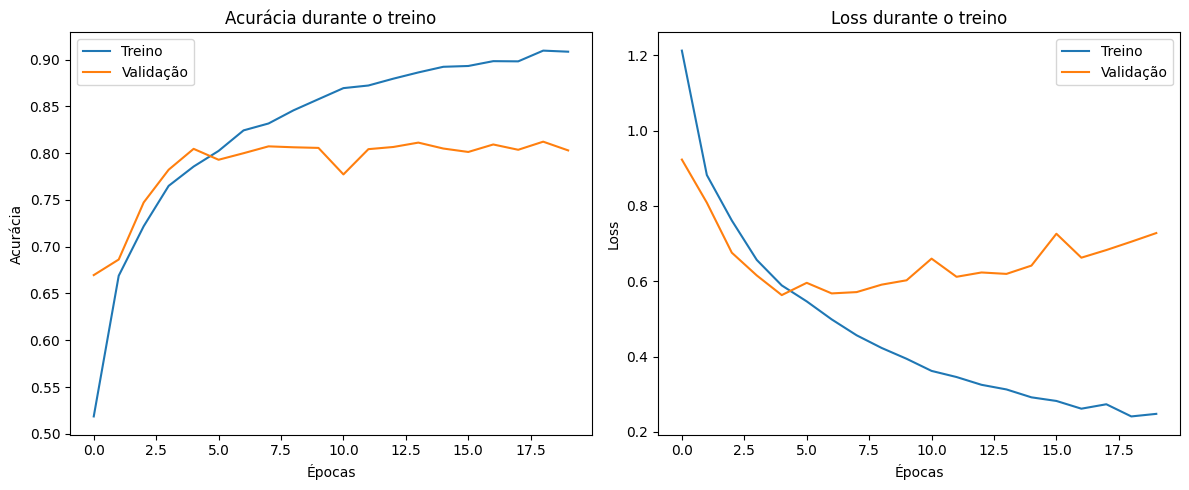

In [37]:
plot_curvas_aprendizado(history_cnn_dropout)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Classification Report (CNN + Dropout):
              precision    recall  f1-score   support

   buildings       0.67      0.87      0.76       437
      forest       0.96      0.92      0.94       474
     glacier       0.82      0.71      0.76       553
    mountain       0.75      0.77      0.76       525
         sea       0.82      0.79      0.81       510
      street       0.83      0.79      0.81       501

    accuracy                           0.80      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.80      0.80      3000



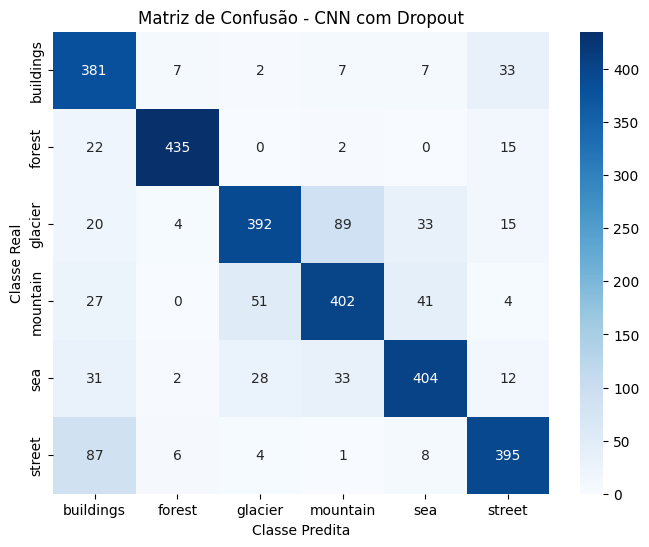

In [38]:
# Avaliação
y_pred_probs_d = modelo_cnn_dropout.predict(test_generator)
y_pred_d = np.argmax(y_pred_probs_d, axis=1)
y_true = test_generator.classes
labels_texto = list(test_generator.class_indices.keys())

# Relatório
print("Classification Report (CNN + Dropout):")
print(classification_report(y_true, y_pred_d, target_names=labels_texto))

# Matriz
matriz_d = confusion_matrix(y_true, y_pred_d)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_d, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels_texto, yticklabels=labels_texto)
plt.title("Matriz de Confusão - CNN com Dropout")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

#### Modelo com Regularização

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

# Modelo CNN com Dropout + L2 (Regularização)
modelo_regularizacao = Sequential()

# Camada Conv2D + L2
modelo_regularizacao.add(Conv2D(32, (3, 3), activation='relu',
                                 input_shape=(64, 64, 3),
                                 kernel_regularizer=regularizers.l2(0.001)))
modelo_regularizacao.add(MaxPooling2D(pool_size=(2, 2)))
modelo_regularizacao.add(Dropout(0.25))

# Segunda camada Conv2D + L2
modelo_regularizacao.add(Conv2D(64, (3, 3), activation='relu',
                                 kernel_regularizer=regularizers.l2(0.001)))
modelo_regularizacao.add(MaxPooling2D(pool_size=(2, 2)))
modelo_regularizacao.add(Dropout(0.25))

# Camada Flatten e Densa com regularização
modelo_regularizacao.add(Flatten())
modelo_regularizacao.add(Dense(128, activation='relu',
                                kernel_regularizer=regularizers.l2(0.001)))
modelo_regularizacao.add(Dropout(0.5))
modelo_regularizacao.add(Dense(6, activation='softmax'))

# Compilação do modelo
modelo_regularizacao.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

modelo_regularizacao.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,926 (6.20 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Treinar o modelo com regularização
with tf.device('/GPU:0'):
  history_regularizacao = modelo_regularizacao.fit(
      train_generator,
      validation_data=test_generator,
      epochs=20,
      batch_size=128
  )

Epoch 1/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.4569 - loss: 1.5364 - val_accuracy: 0.6763 - val_loss: 1.0354
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6504 - loss: 1.0684 - val_accuracy: 0.7357 - val_loss: 0.9129
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.6946 - loss: 0.9832 - val_accuracy: 0.7543 - val_loss: 0.8547
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7144 - loss: 0.9436 - val_accuracy: 0.7450 - val_loss: 0.9158
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7489 - loss: 0.8842 - val_accuracy: 0.7843 - val_loss: 0.8211
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7459 - loss: 0.8915 - val_accuracy: 0.7917 - val_loss: 0.8119
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7640 - loss: 0.8607 - val_accuracy: 0.7890 - val_loss: 0.7863
Epoch 8/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.7744 - loss: 0.8302 - 

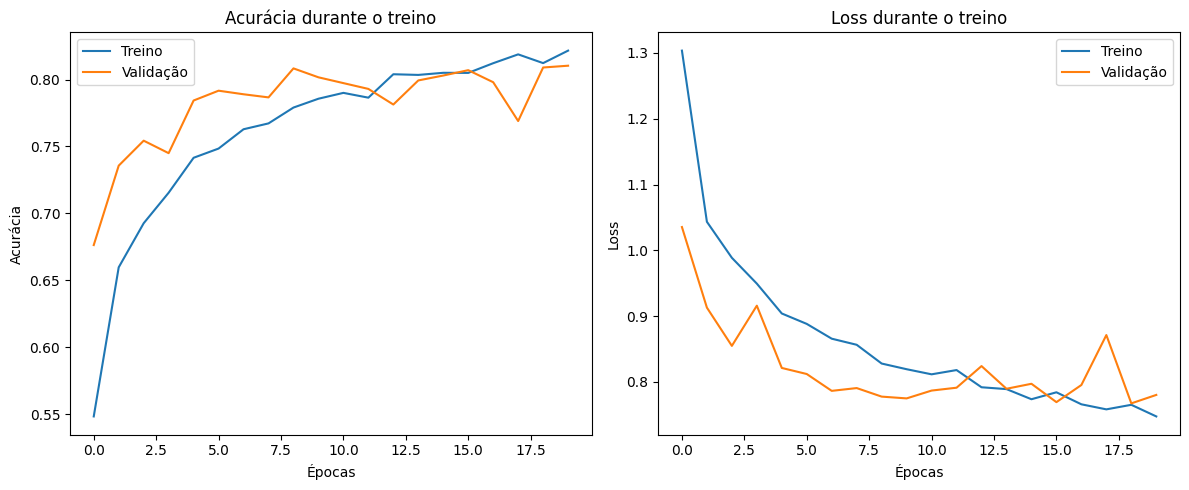

In [41]:
plot_curvas_aprendizado(history_regularizacao)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Classification Report (Modelo com Regularização - Dropout + L2):
              precision    recall  f1-score   support

   buildings       0.86      0.66      0.75       437
      forest       0.95      0.95      0.95       474
     glacier       0.80      0.74      0.77       553
    mountain       0.73      0.83      0.78       525
         sea       0.82      0.75      0.79       510
      street       0.75      0.92      0.83       501

    accuracy                           0.81      3000
   macro avg       0.82      0.81      0.81      3000
weighted avg       0.82      0.81      0.81      3000



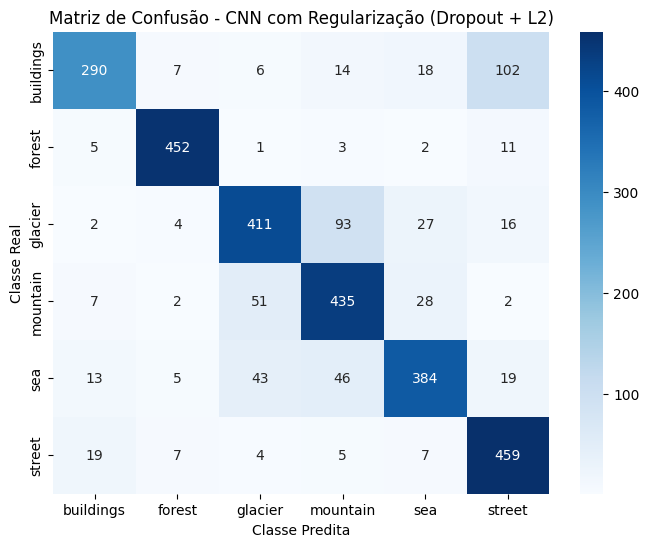

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_probs_reg = modelo_regularizacao.predict(test_generator)
y_pred_reg = np.argmax(y_pred_probs_reg, axis=1)
y_true = test_generator.classes
labels_texto = list(test_generator.class_indices.keys())

print("Classification Report (Modelo com Regularização - Dropout + L2):")
print(classification_report(y_true, y_pred_reg, target_names=labels_texto))

matriz_reg = confusion_matrix(y_true, y_pred_reg)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_reg, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels_texto, yticklabels=labels_texto)
plt.title("Matriz de Confusão - CNN com Regularização (Dropout + L2)")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

#### Modelo com Data Augmentation

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Novo gerador com aumentos de dados
datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Novo gerador para treino (com aumento)
train_generator_aug = datagen_aug.flow_from_dataframe(
    dataframe=df_train,
    x_col='full_path',
    y_col='target',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Validação permanece igual (sem augmentação!)
test_generator_aug = datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='full_path',
    y_col='target',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 13941 validated image filenames belonging to 6 classes.
Found 3000 validated image filenames belonging to 6 classes.


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelo_cnn_aug = Sequential()

modelo_cnn_aug.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
modelo_cnn_aug.add(MaxPooling2D(pool_size=(2, 2)))

modelo_cnn_aug.add(Conv2D(64, (3, 3), activation='relu'))
modelo_cnn_aug.add(MaxPooling2D(pool_size=(2, 2)))

modelo_cnn_aug.add(Flatten())
modelo_cnn_aug.add(Dense(64, activation='relu'))
modelo_cnn_aug.add(Dense(6, activation='softmax'))

# Compilação do modelo
modelo_cnn_aug.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

modelo_cnn_aug.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,662 (3.14 MB)

 Trainable params: 822,662 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Treinar o modelo com Data Argumentation
with tf.device('/GPU:0'):
  history_cnn_aug = modelo_cnn_aug.fit(
    train_generator_aug,
    validation_data=test_generator_aug,
    epochs=20,
    batch_size=128
  )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


436/436 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.5104 - loss: 1.2356 - val_accuracy: 0.6637 - val_loss: 0.9305
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - accuracy: 0.6694 - loss: 0.8771 - val_accuracy: 0.7263 - val_loss: 0.7524
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.7041 - loss: 0.7991 - val_accuracy: 0.7523 - val_loss: 0.6817
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.7402 - loss: 0.7110 - val_accuracy: 0.7633 - val_loss: 0.6610
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.7620 - loss: 0.6633 - val_accuracy: 0.7860 - val_loss: 0.6029
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - accuracy: 0.7758 - loss: 0.6240 - val_accuracy: 0.7760 - val_loss: 0.6203
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - accuracy: 0.7835 - loss: 0.5949 - val_accuracy: 0.8030 - val_loss: 0.5601
Epoch 8/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.7898 - loss: 0.5851 - val_accurac

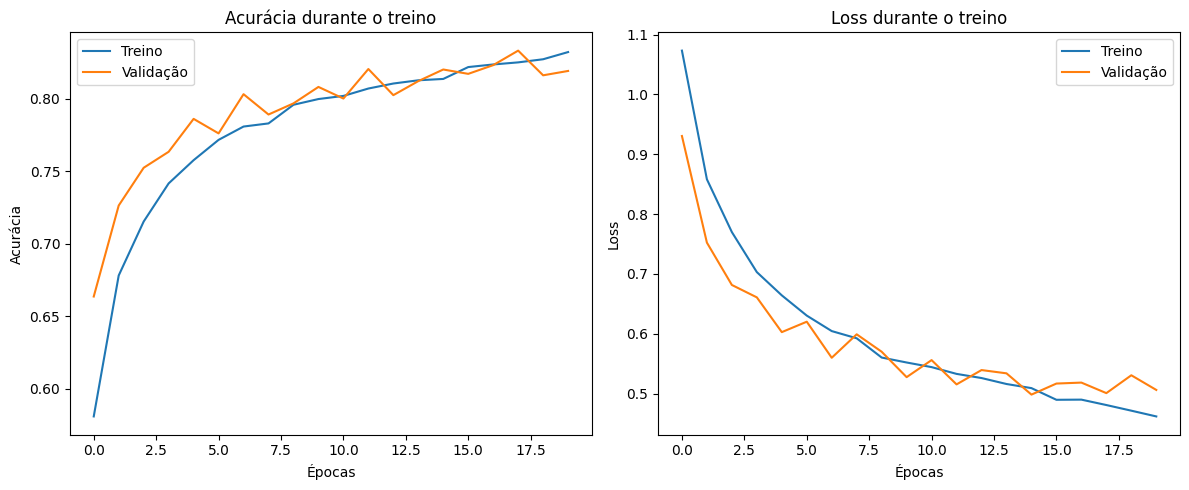

In [46]:
plot_curvas_aprendizado(history_cnn_aug)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
Classification Report (CNN com Augmentation):
              precision    recall  f1-score   support

   buildings       0.86      0.77      0.81       437
      forest       0.95      0.95      0.95       474
     glacier       0.81      0.74      0.77       553
    mountain       0.80      0.70      0.75       525
         sea       0.72      0.87      0.79       510
      street       0.81      0.89      0.85       501

    accuracy                           0.82      3000
   macro avg       0.83      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



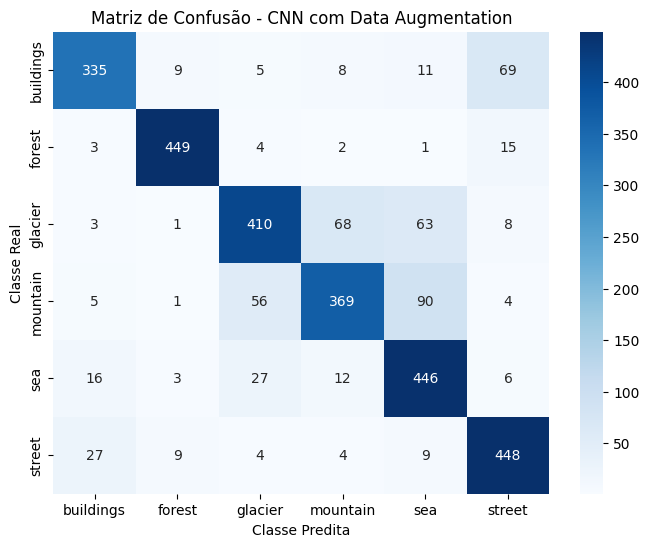

In [47]:
y_pred_probs_aug = modelo_cnn_aug.predict(test_generator_aug)
y_pred_aug = np.argmax(y_pred_probs_aug, axis=1)
y_true = test_generator_aug.classes
labels_texto = list(test_generator_aug.class_indices.keys())

print("Classification Report (CNN com Augmentation):")
print(classification_report(y_true, y_pred_aug, target_names=labels_texto))

matriz_aug = confusion_matrix(y_true, y_pred_aug)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_aug, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels_texto, yticklabels=labels_texto)
plt.title("Matriz de Confusão - CNN com Data Augmentation")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

#### Modelo EarlyStop

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback de EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',          # observa a perda de validação
    patience=5,                  # para se não melhorar por 5 épocas seguidas
    restore_best_weights=True   # restaura os melhores pesos automaticamente
)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

modelo_cnn_early = Sequential()

modelo_cnn_early.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
modelo_cnn_early.add(MaxPooling2D(pool_size=(2, 2)))
modelo_cnn_early.add(Dropout(0.25))

modelo_cnn_early.add(Conv2D(64, (3, 3), activation='relu'))
modelo_cnn_early.add(MaxPooling2D(pool_size=(2, 2)))
modelo_cnn_early.add(Dropout(0.25))

modelo_cnn_early.add(Flatten())
modelo_cnn_early.add(Dense(128, activation='relu'))
modelo_cnn_early.add(Dropout(0.5))
modelo_cnn_early.add(Dense(6, activation='softmax'))

# Compilação do modelo
modelo_cnn_early.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

modelo_cnn_early.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,926 (6.20 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
with tf.device('/GPU:0'):
  history_cnn_early = modelo_cnn_early.fit(
      train_generator,
      validation_data=test_generator,
      epochs=50,
      batch_size=128,                   # colocamos um número alto, o early stopping decide quando parar
      callbacks=[early_stop]
  )

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.4757 - loss: 1.3093 - val_accuracy: 0.6997 - val_loss: 0.8557
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.6764 - loss: 0.8721 - val_accuracy: 0.7237 - val_loss: 0.7473
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7448 - loss: 0.7103 - val_accuracy: 0.7550 - val_loss: 0.6677
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.7737 - loss: 0.6309 - val_accuracy: 0.7547 - val_loss: 0.6799
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7930 - loss: 0.5787 - val_accuracy: 0.7917 - val_loss: 0.5916
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8105 - loss: 0.5190 - val_accuracy: 0.7863 - val_loss: 0.5946
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8263 - loss: 0.4856 - val_accuracy: 0.8150 - val_loss: 0.5637
Epoch 8/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8477 - loss: 0.4331 - 

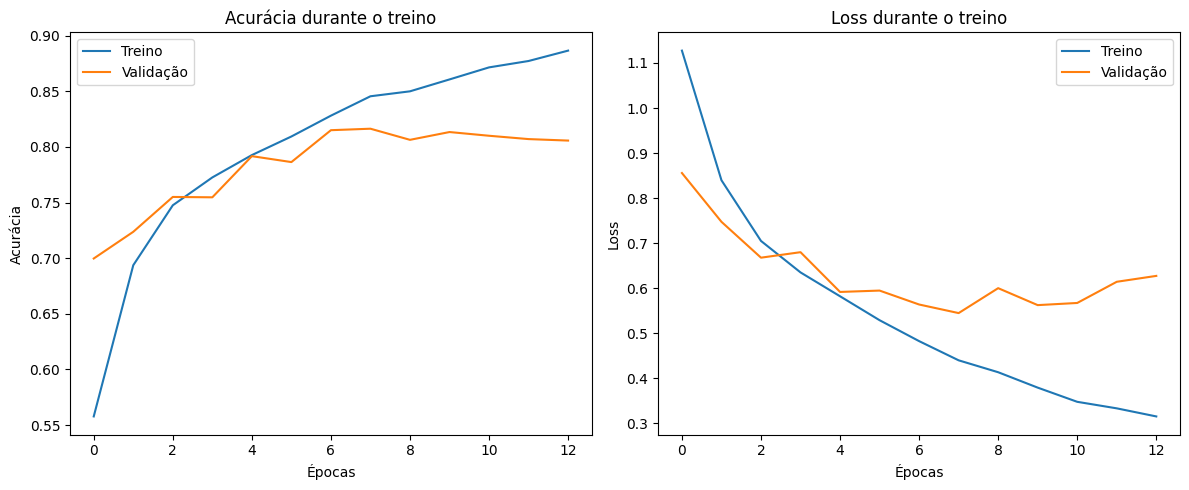

In [51]:
plot_curvas_aprendizado(history_cnn_early)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Classification Report (CNN com EarlyStopping):
              precision    recall  f1-score   support

   buildings       0.83      0.73      0.78       437
      forest       0.92      0.97      0.94       474
     glacier       0.82      0.74      0.78       553
    mountain       0.75      0.79      0.77       525
         sea       0.78      0.82      0.80       510
      street       0.82      0.85      0.84       501

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



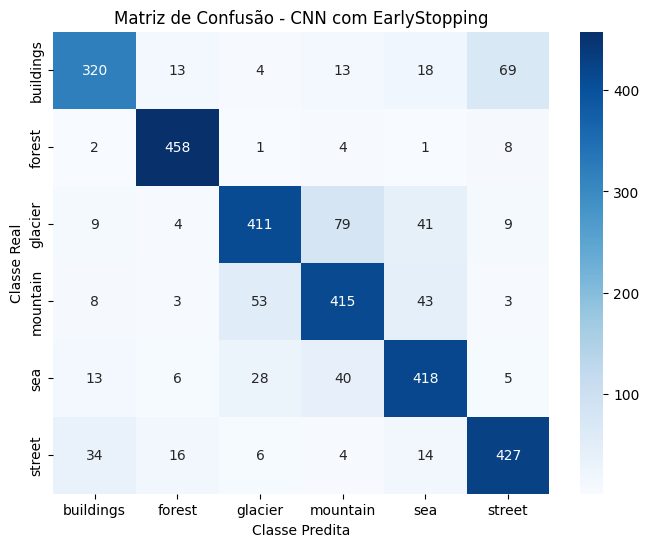

In [52]:
y_pred_probs_early = modelo_cnn_early.predict(test_generator)
y_pred_early = np.argmax(y_pred_probs_early, axis=1)
y_true = test_generator.classes
labels_texto = list(test_generator.class_indices.keys())

print("Classification Report (CNN com EarlyStopping):")
print(classification_report(y_true, y_pred_early, target_names=labels_texto))

matriz_early = confusion_matrix(y_true, y_pred_early)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_early, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels_texto, yticklabels=labels_texto)
plt.title("Matriz de Confusão - CNN com EarlyStopping")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

#### Modelo com Transfer Learning usando VGG16

In [53]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Carregar a VGG16 sem as camadas finais (include_top=False) e com pesos do ImageNet
vgg_base = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(64, 64, 3)
)

# Congela os pesos da VGG16 — só a parte final será treinada
vgg_base.trainable = False

for camada in vgg_base.layers[-4:]:
    camada.trainable = True

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [54]:
# Monta a nova rede
modelo_vgg16 = Sequential([
    vgg_base,                 # extrator de características
    Flatten(),                # transforma saída 3D da VGG16 em vetor
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # saída com 6 classes
])

# Compilação do modelo
modelo_vgg16.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

modelo_vgg16.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,734 (57.14 MB)

 Trainable params: 7,342,470 (28.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [55]:
# Treinamento do modelo com VGG16
with tf.device('/GPU:0'):
  history_vgg16 = modelo_vgg16.fit(
      train_generator,
      validation_data=test_generator,
      epochs=20,
      batch_size=128
  )

Epoch 1/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.7189 - loss: 0.7620 - val_accuracy: 0.8220 - val_loss: 0.5013
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8701 - loss: 0.3912 - val_accuracy: 0.8637 - val_loss: 0.3872
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9003 - loss: 0.2875 - val_accuracy: 0.8607 - val_loss: 0.4408
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9249 - loss: 0.2265 - val_accuracy: 0.8503 - val_loss: 0.4511
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9257 - loss: 0.2165 - val_accuracy: 0.8700 - val_loss: 0.3816
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9367 - loss: 0.1878 - val_accuracy: 0.8743 - val_loss: 0.4694
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9491 - loss: 0.1437 - val_accuracy: 0.8670 - val_loss: 0.5046
Epoch 8/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9578 - loss: 0.1316 - 

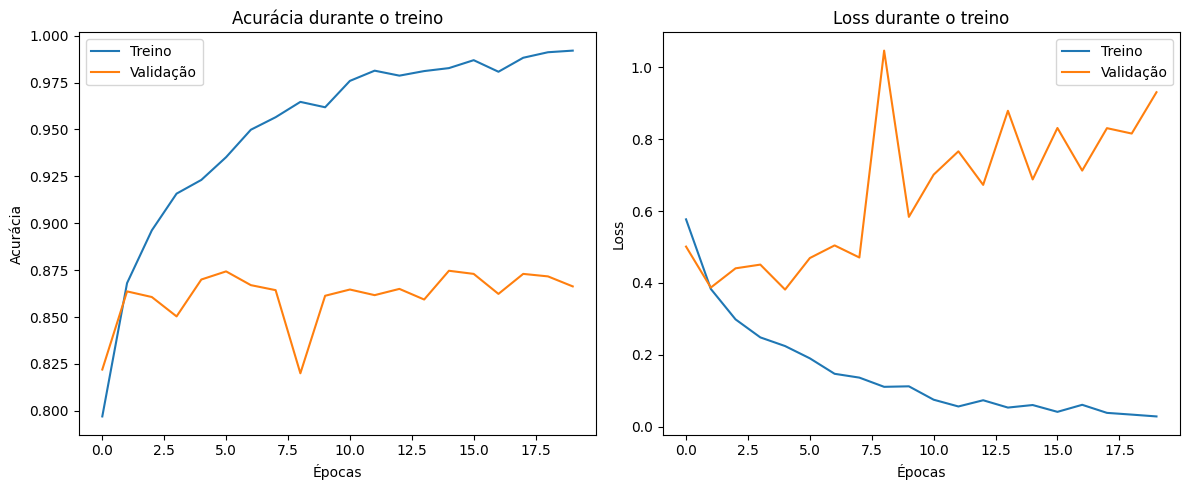

In [56]:
plot_curvas_aprendizado(history_vgg16)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
Classification Report (Transfer Learning - VGG16):
              precision    recall  f1-score   support

   buildings       0.93      0.81      0.86       437
      forest       0.95      0.98      0.97       474
     glacier       0.83      0.79      0.81       553
    mountain       0.79      0.85      0.82       525
         sea       0.86      0.87      0.86       510
      street       0.86      0.91      0.89       501

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



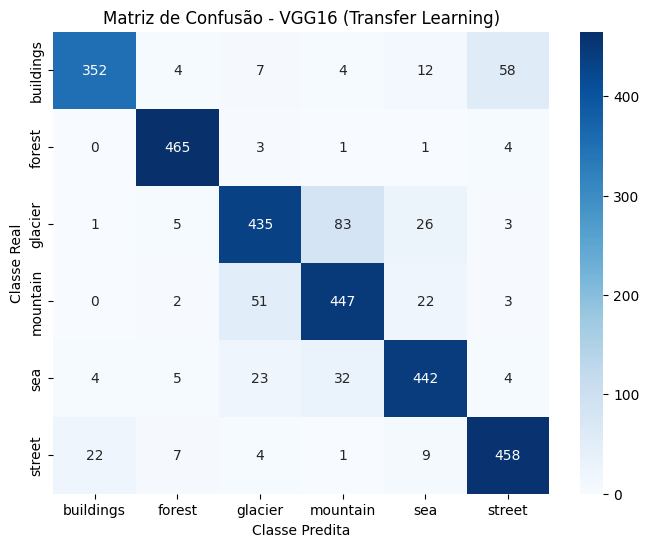

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_probs_vgg = modelo_vgg16.predict(test_generator)
y_pred_vgg = np.argmax(y_pred_probs_vgg, axis=1)
y_true = test_generator.classes
labels_texto = list(test_generator.class_indices.keys())

print("Classification Report (Transfer Learning - VGG16):")
print(classification_report(y_true, y_pred_vgg, target_names=labels_texto))

matriz_vgg = confusion_matrix(y_true, y_pred_vgg)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_vgg, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels_texto, yticklabels=labels_texto)
plt.title("Matriz de Confusão - VGG16 (Transfer Learning)")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

### Comparações dos modelos

#### Acurácia, F1-score (macro avg)

In [60]:
from sklearn.metrics import classification_report, f1_score
import pandas as pd
import numpy as np

def avaliar_modelo(nome, model, history, generator):
    # Previsões
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = generator.classes

    # F1 macro avg
    f1 = f1_score(y_true, y_pred, average='macro')

    # Última acurácia de validação
    acc_trei = max(history.history['accuracy']) * 100
    acc_val = max(history.history['val_accuracy']) * 100

    # Métricas de loss
    # mean_loss_train = np.mean(history.history['loss'])
    # mean_loss_val = np.mean(history.history['val_loss'])
    # dif_media_loss = mean_loss_val - mean_loss_train

    return {
        'Modelo': nome,
        'Acurácia Treino (%)': round(acc_trei, 2),
        'Acurácia Validação (%)': round(acc_val, 2),
        'F1-score (macro avg)': round(f1, 2),
    }

# Lista com os modelos e histories que você treinou (adicione os seus aqui!)
resultados = []

resultados.append(avaliar_modelo("MLP (Rede Densa)", modelo_denso, history_denso, test_generator))
resultados.append(avaliar_modelo("Modelo com Baseline CNN", modelo_cnn, history_cnn, test_generator))
resultados.append(avaliar_modelo("Modelo com Dropout", modelo_cnn_dropout, history_cnn_dropout, test_generator))
resultados.append(avaliar_modelo("Modelo com Regularização (Drop + L2)", modelo_regularizacao, history_regularizacao, test_generator))
resultados.append(avaliar_modelo("Modelo com Data Augmentation", modelo_cnn_aug, history_cnn_aug, test_generator_aug))
resultados.append(avaliar_modelo("Modelo com EarlyStopping", modelo_cnn_early, history_cnn_early, test_generator))
resultados.append(avaliar_modelo("Modelo com VGG16 (Transfer Learning)", modelo_vgg16, history_vgg16, test_generator))

# Criar dataframe final
df_comparativo = pd.DataFrame(resultados)

# Visualizar
import IPython.display as display
display.display(df_comparativo)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


,Modelo,Acurácia Treino (%),Acurácia Validação (%),F1-score (macro avg)
0,MLP (Rede Densa),73.55,60.37,0.57
1,Modelo com Baseline CNN,98.98,78.90,0.76
2,Modelo com Dropout,90.97,81.23,0.81
3,Modelo com Regularização (Drop + L2),82.16,81.03,0.81
4,Modelo com Data Augmentation,83.20,83.30,0.82
5,Modelo com EarlyStopping,88.65,81.63,0.82
6,Modelo com VGG16 (Transfer Learning),99.20,87.47,0.87


#### Matriz de Confusão, Acurária e Loss

In [61]:
def comparar_modelos_3colunas(modelos_info, class_names):
    num_modelos = len(modelos_info)
    fig, axes = plt.subplots(num_modelos, 3, figsize=(20, 5 * num_modelos))

    for i, modelo in enumerate(modelos_info):
        hist_data = modelo['history'].history  # Corrigido aqui
        epochs = range(1, len(hist_data['accuracy']) + 1)

        # 1️⃣ Matriz de Confusão
        matriz = confusion_matrix(modelo['y_true'], modelo['y_pred'])
        sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names,
                    ax=axes[i, 0])
        axes[i, 0].set_title(f"Matriz de Confusão - {modelo['nome']}")
        axes[i, 0].set_xlabel("Predito")
        axes[i, 0].set_ylabel("Real")
        axes[i, 0].tick_params(axis='x', rotation=45)

        # 2️⃣ Acurácia
        axes[i, 1].plot(epochs, hist_data['accuracy'], label='Treino')
        axes[i, 1].plot(epochs, hist_data['val_accuracy'], label='Validação')
        axes[i, 1].set_title(f"Acurácia - {modelo['nome']}")
        axes[i, 1].set_xlabel('Épocas')
        axes[i, 1].set_ylabel('Acurácia')
        axes[i, 1].legend()
        axes[i, 1].grid(True)

        # 3️⃣ Loss
        axes[i, 2].plot(epochs, hist_data['loss'], label='Treino', linestyle='--')
        axes[i, 2].plot(epochs, hist_data['val_loss'], label='Validação', linestyle='--')
        axes[i, 2].set_title(f"Loss - {modelo['nome']}")
        axes[i, 2].set_xlabel('Épocas')
        axes[i, 2].set_ylabel('Loss')
        axes[i, 2].legend()
        axes[i, 2].grid(True)

    plt.tight_layout()
    plt.show()

In [62]:
# Gerar todas as variáveis de comparação

# Densa
y_true_denso = test_generator.classes
y_pred_denso = np.argmax(modelo_denso.predict(test_generator), axis=1)

# CNN Baseline
y_true_cnn = test_generator.classes
y_pred_cnn = np.argmax(modelo_cnn.predict(test_generator), axis=1)

# CNN com Dropout
y_true_cnn_dropout = test_generator.classes
y_pred_cnn_dropout = np.argmax(modelo_cnn_dropout.predict(test_generator), axis=1)

# CNN com Regularização
y_true_regularizacao = test_generator.classes
y_pred_regularizacao = np.argmax(modelo_regularizacao.predict(test_generator), axis=1)

# CNN com Data Augmentation
y_true_cnn_aug = test_generator.classes
y_pred_cnn_aug = np.argmax(modelo_cnn_aug.predict(test_generator), axis=1)

# CNN com EarlyStop
y_true_cnn_early = test_generator.classes
y_pred_cnn_early = np.argmax(modelo_cnn_early.predict(test_generator), axis=1)

# CNN com Transfer Learning (com VGG16)
y_true_vgg16 = test_generator.classes
y_pred_vgg16 = np.argmax(modelo_vgg16.predict(test_generator), axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


In [63]:
modelos_info = [
    {
        'nome': 'Rede Densa',
        'y_true': y_true_denso,
        'y_pred': y_pred_denso,
        'history': history_denso
    },
    {
        'nome': 'CNN Baseline',
        'y_true': y_true_cnn,
        'y_pred': y_pred_cnn,
        'history': history_cnn
    },
    {
        'nome': 'CNN com Dropout',
        'y_true': y_true_cnn_dropout,
        'y_pred': y_pred_cnn_dropout,
        'history': history_cnn_dropout
    },
    {
        'nome': 'CNN com Regularização',
        'y_true': y_true_regularizacao,
        'y_pred': y_pred_regularizacao,
        'history': history_regularizacao
    },
    {
        'nome': 'CNN com Data Augmentation',
        'y_true': y_true_cnn_aug,
        'y_pred': y_pred_cnn_aug,
        'history': history_cnn_aug
    },
    {
        'nome': 'CNN com EarlyStopping',
        'y_true': y_true_cnn_early,
        'y_pred': y_pred_cnn_early,
        'history': history_cnn_early
    },
    {
        'nome': 'CNN com Transfer Learning (VGG16)',
        'y_true': y_true_vgg16,
        'y_pred': y_pred_vgg16,
        'history': history_vgg16
    }
]

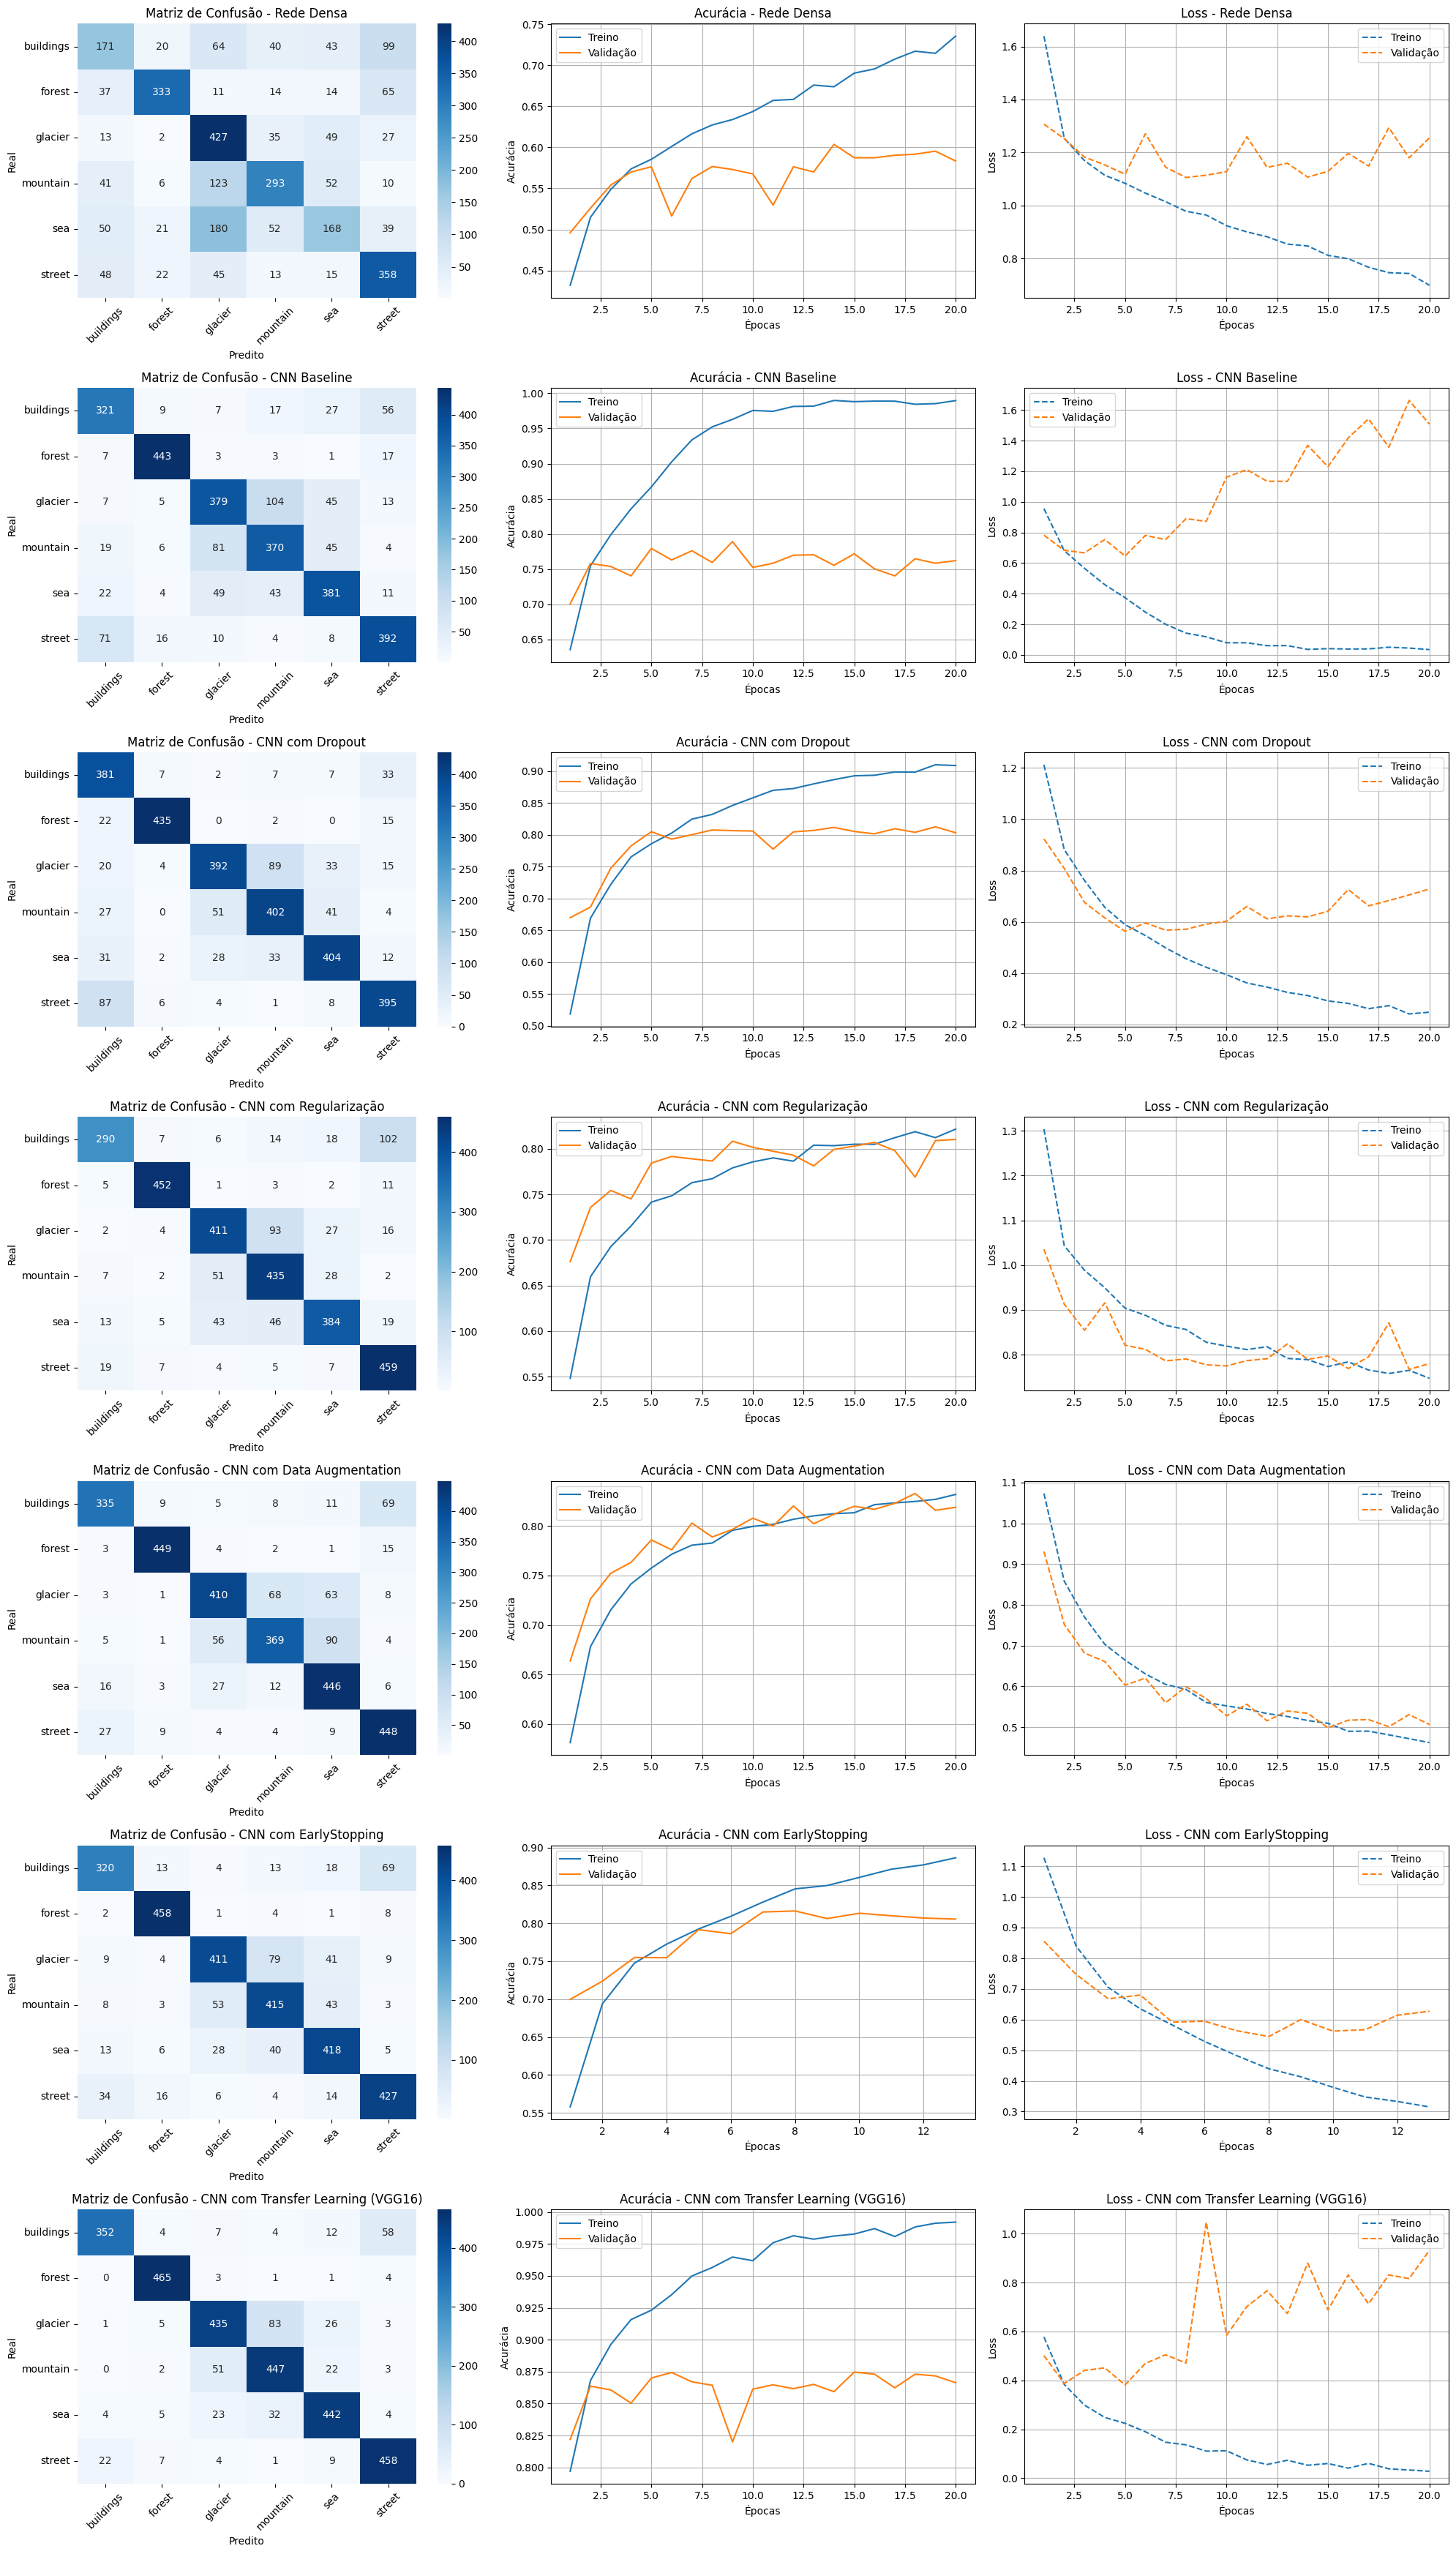

In [64]:
comparar_modelos_3colunas(modelos_info, class_names)